# Stroke Prediction Analysis

In [1]:
# Import modules for data analysis
import pandas as pd

In [2]:
# Load the data and preview the first 5 rows to ensure the data is loaded correctly
link_to_file = "https://raw.githubusercontent.com/alexander-billings/stroke_prediction/main/stroke_data.csv"
df = pd.read_csv(link_to_file, index_col = 'id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [3]:
# Inspect the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [4]:
# Inspect the numerical data for abnormalities
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Are there columns that should be dropped?

### None at a glance

## Are there duplicate columns?

In [5]:
df.duplicated().sum()

0

### No duplicate rows found

## Are there any rows with missing data?

In [6]:
# Inspect the data for null values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Drop the missing data
df.drop(df.loc[df['bmi'].isna()].index, inplace=True)

### Dropped rows with missing data
Considering it was only 201 rows with missing data in the bmi column, I went ahead and dropped it. I will return to this if balance starts to impact model performance.

## Are there any inconsistent categories?

In [8]:
# Iterate through each column that is an object and list the unique values with counts
for column in df.columns:
    if df[column].dtype == 'object':
        print("Values in", column)
        print(df[column].value_counts(), '\n')

Values in gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64 

Values in ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64 

Values in work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64 

Values in Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64 

Values in smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64 



In [9]:
# Dropping gender outlier due to sample size of one
df.drop(index=df.loc[df['gender'] == 'Other'].index, inplace=True)

In [10]:
# Taking a glance at "Unknown" smokers
df.loc[df['smoking_status'] == 'Unknown'].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
42117,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown,1
57419,Male,59.0,0,0,Yes,Private,Rural,96.16,44.1,Unknown,1
49130,Male,74.0,0,0,Yes,Private,Urban,98.55,25.6,Unknown,1
37726,Female,80.0,1,0,Yes,Self-employed,Urban,68.56,26.2,Unknown,1


In [11]:
# Looking at stroke frequency among "Unknown" smokers
df.loc[df['smoking_status'] == 'Unknown']['stroke'].value_counts()

0    1454
1      29
Name: stroke, dtype: int64

### Category observations
* Gender: "Other" found in one row. There is not enough of a sample size to determine correlations here so the decision to drop the row was made.

* Smoking: Large number of "Unkown" smokers. Considering the medical literature around smoking increasing risk of stroke, I want to keep the smoking_status column in. I have decided to leave "Unknown" as-is, pending model performance.

# Analysis

## Features

In [12]:
# Import modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up filters
# Opted positive and negative filters over '~' operator for readability
stroke_positive = df['stroke'] == 1
stroke_negative = df['stroke'] == 0

gender_male   = df['gender'] == 'Male'
gender_female = df['gender'] == 'Female'

hypertension_positive = df['hypertension'] == 1
hypertension_negative = df['hypertension'] == 0

adult = df['age'] > 18

In [13]:
# List all the features
print("Features to Evaluate:\n")
for column in df.drop(columns='stroke').columns:
    print(column)

Features to Evaluate:

gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status


In [14]:
# Inspect numerical data for analysis
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


### Gender

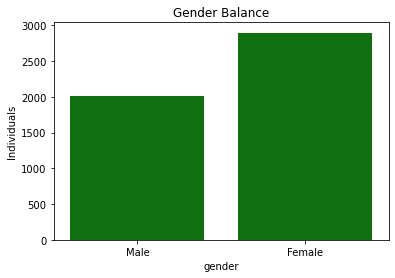

In [15]:
sns.countplot(data = df, x = 'gender', color='Green')
plt.ylabel("Individuals")
plt.title("Gender Balance");

In [16]:
# Group female gender by stroke
df[['stroke', 'gender']].loc[gender_female].groupby('stroke').count()

,gender
stroke,
0,2777
1,120


In [17]:
# Group male gender by stroke
df[['stroke', 'gender']].loc[gender_male].groupby('stroke').count()

,gender
stroke,
0,1922
1,89


Gender observations:
* Larger Female sample set
* No initially noticable correlation with gender and stroke risk

### Age

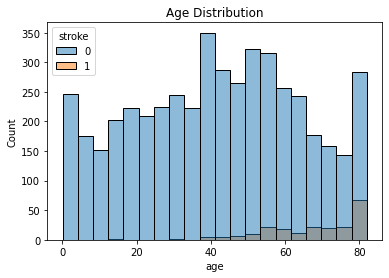

In [18]:
sns.histplot(data=df, x='age', hue='stroke')
plt.title("Age Distribution");

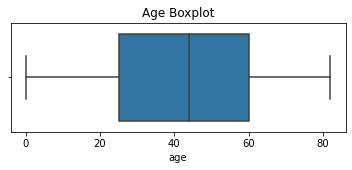

In [19]:
plt.figure(figsize=(6, 2))
sns.boxplot(data=df, x='age')
plt.title("Age Boxplot");

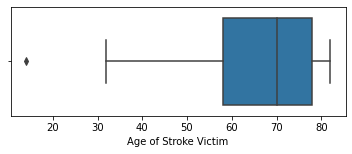

In [20]:
plt.figure(figsize=(6, 2))
sns.boxplot(data=df.loc[stroke_positive], x='age')
plt.xlabel("Age of Stroke Victim");

In [21]:
# Looking at young victim outlier
df.loc[(df['age'] < 30) & stroke_positive]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1


Age observations:

* Age distribution is reasonable
* There seems to be a decent correlation between older age and stroke risk
* Outlier found in a 14 year-old stroke victim
  * Decision to keep outlier was made based on patient's glucose level being very low possibly driving the stroke factor
  * Medical journal article suggesting low glucose therapies as a risk factor: https://pubmed.ncbi.nlm.nih.gov/28522196/
  * Possible diabetic diagnosis

### Hypertension

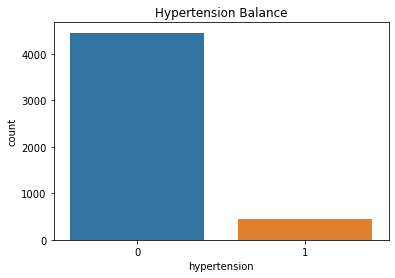

In [22]:
sns.countplot(data = df, x = 'hypertension')
plt.title("Hypertension Balance");

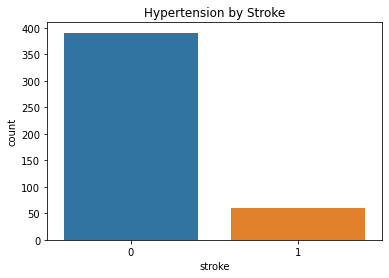

In [23]:
sns.countplot(data=df.loc[hypertension_positive], x='stroke')
plt.title("Hypertension by Stroke");

Hypertension Observations:
* Small connection between hypertension positive and stroke
* Feature is not balanced

### Heart Disease

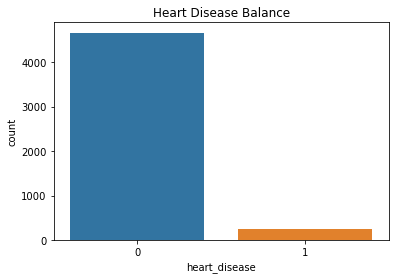

In [24]:
sns.countplot(data = df, x = 'heart_disease')
plt.title("Heart Disease Balance");

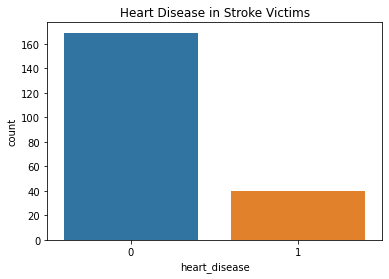

In [25]:
sns.countplot(data=df.loc[stroke_positive], x='heart_disease')
plt.title("Heart Disease in Stroke Victims");

Heart Disease Observations:
* Connection betwen heart disease and stroke
* Feature is not balanced

### Ever Married

In [26]:
df[['ever_married', 'stroke']].groupby('ever_married').sum()

,stroke
ever_married,
No,23
Yes,186


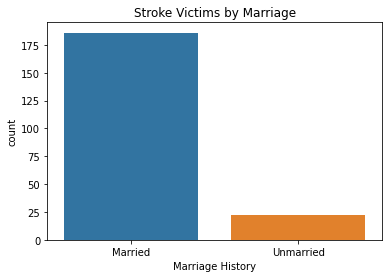

In [27]:
sns.countplot(data = df.loc[adult & stroke_positive], x = 'ever_married')
plt.title("Stroke Victims by Marriage")
plt.xlabel("Marriage History")
plt.xticks([0, 1], ['Married', 'Unmarried']);

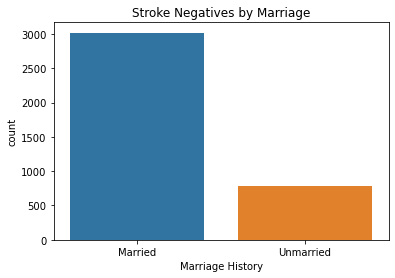

In [28]:
sns.countplot(data=df.loc[adult & stroke_negative], x='ever_married')
plt.title("Stroke Negatives by Marriage")
plt.xlabel("Marriage History")
plt.xticks([0, 1], ['Married', 'Unmarried']);

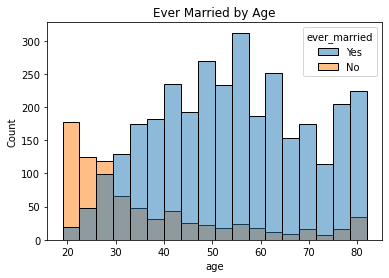

In [29]:
sns.histplot(data=df.loc[adult], x='age', hue='ever_married')
plt.title("Ever Married by Age");

Ever Married Observations:
* Marriage/stroke connection should be controlled for 'age' considering this data set has nobody married below the age of 18
* Connection between being married and risk of stroke
  * This contradicts some studies, additional analysis might be needed
  * Sample study showing contradiction: https://heart.bmj.com/content/104/23/1937
* Marriage status at time of stroke would probably be more valuable as a feature
  * Unmarried, Married, Widowed, or Divorced as examples
* Consider evaluating model with and without ever_married feature

### Work Type

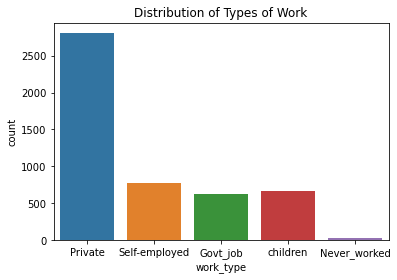

In [30]:
sns.countplot(data = df, x = 'work_type')
plt.title("Distribution of Types of Work");

Work Type Observations:
* Never Worked sample size is small
* Private is several-fold more common than other work types

### Rural or Urban Residence

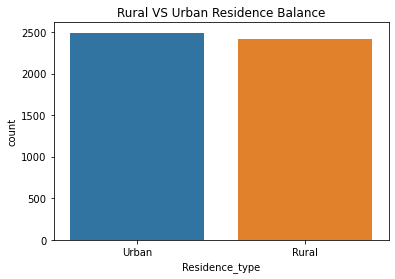

In [31]:
sns.countplot(data = df, x = 'Residence_type')
plt.title("Rural VS Urban Residence Balance");

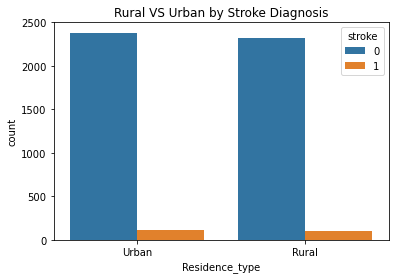

In [32]:
sns.countplot(data = df, x = 'Residence_type', hue='stroke')
plt.title("Rural VS Urban by Stroke Diagnosis");

Residence Type Observation:
* Good balance of feature present

### Average Glucose Level

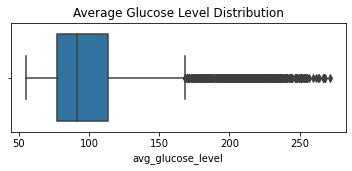

In [33]:
plt.figure(figsize=(6,2))
sns.boxplot(data = df, x = 'avg_glucose_level')
plt.title("Average Glucose Level Distribution");

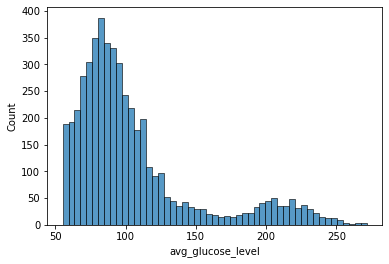

In [34]:
sns.histplot(data=df, x='avg_glucose_level');

In [35]:
# Checking outliers found in the above 260 range
df.loc[df['avg_glucose_level'] > 260].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0
27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
13155,Female,67.0,1,0,Yes,Govt_job,Rural,263.56,26.3,never smoked,0
50070,Female,62.0,1,0,Yes,Self-employed,Rural,261.67,43.0,formerly smoked,0
10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0


Average Blood Glucose Levels Observations:
* Healthy fasting glucose is typically between 70 and 130, 1-2 hours after eating can be up to 180
  * source: https://www.endocrineweb.com/conditions/hyperglycemia/hyperglycemia-when-your-blood-glucose-level-goes-too-high
* 2nd and 3rd quartiles seem to fit into fasting range fairly neatly
* Consider filtering into three groups in reports
  * low    < 70
  * normal = 70-130
  * high   > 130

### BMI

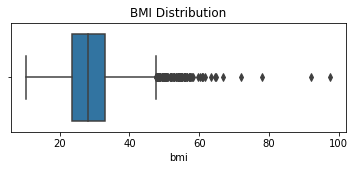

In [36]:
plt.figure(figsize=(6,2))
sns.boxplot( data = df, x = 'bmi')
plt.title("BMI Distribution");

In [37]:
df.loc[df['bmi'] > 70].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


BMI Observations:
* Healthy BMI is considered to be 18.5 - 24.9
  * Source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html
  * Source also notes BMI is not a direct measurements of body fat or health
* The 2nd and 3rd quartile seems to fit a little over "healthy" weight
* Outliers aren't impossible, though uncommon, so the decision was made to keep them


### Smoking Status

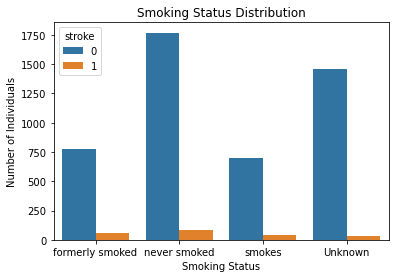

In [68]:
sns.countplot(data = df, x = 'smoking_status', hue='stroke')
plt.xlabel("Smoking Status")
plt.ylabel("Number of Individuals")
plt.title("Smoking Status Distribution");

In [ ]:
# Need to explore other ways to plot as the colors bleed together
sns.histplot(data=df, x='age', hue='smoking_status', label=['Unknown', 'Never', 'Former', 'Current']);
plt.title("Smoking Status by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

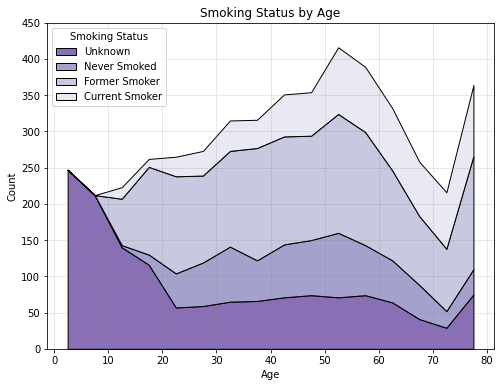

In [191]:
# Need to explore other ways to plot as the colors bleed together
plt.figure(figsize=(8,6))

sns.histplot(
                data=df, x='age',
                hue='smoking_status', 
                multiple='stack', 
                bins=20, 
                shrink=1,
                element='poly',
                binrange=[0, 80],
                binwidth=5,
                label=['Unknown', 'Never', 'Former', 'Current'],
                palette='Purples'
            )

plt.title("Smoking Status by Age")
plt.legend(loc='upper left', labels = ['Unknown', 'Never Smoked', 'Former Smoker', 'Current Smoker'], title='Smoking Status')
plt.xlabel("Age")
plt.ylabel("Count")
plt.ylim(0, 450)
plt.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

Smoking Status Observations:
* "Unknown" might be reliabily interpreteted as "never smoked" given the correlation to younger ages
* Consider experimenting with mapping "Unknown" to "never_smoked" or "too young to smoke"
  * If mapping to "too young", be sure select a reasonable age such as 0-16 for the new category

## Target

### Has the individual had a stroke?

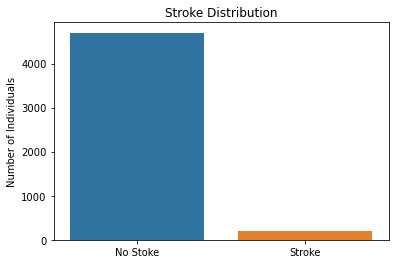

In [75]:
sns.countplot(data = df, x = 'stroke')
plt.xticks(ticks=[0, 1], labels=['No Stoke', 'Stroke'])
plt.xlabel("")
plt.ylabel("Number of Individuals")
plt.title("Stroke Distribution");

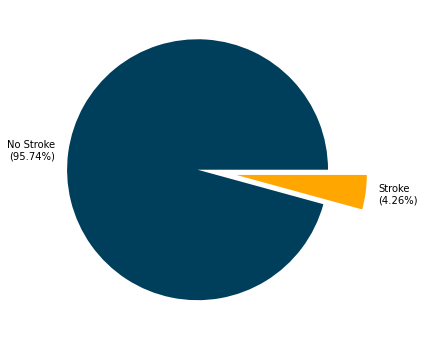

In [108]:
plt.figure(facecolor='#FFFFFF', figsize=(6, 6))
pie_labels = ['No Stroke\n(95.74%)', 'Stroke\n(4.26%)']
pie_colors = ['#003F5C', '#FFA600']
plt.pie(df['stroke'].value_counts(), labels=pie_labels, colors=pie_colors, explode = (0, 0.3), pctdistance=0.6);

In [41]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

Target Observations:
* Target set is unbalanced towards no stroke
  * Consider dropping stroke-negative rows to help balance
  * Ensure stratify is configured during train/test split

## Correlation Heatmap

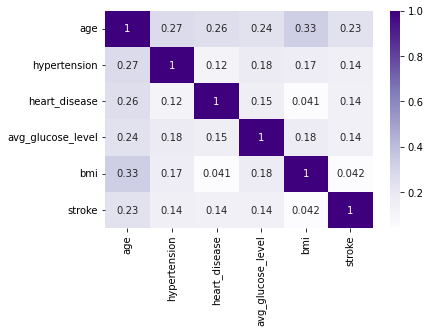

In [42]:
sns.heatmap(data = df.corr(), cmap = 'Purples', annot = True);

Correlation Observation:
* No strong correlations found
  * This is probably likely due to target balance
  * Consider addressing balance issue before continuing
* BMI had the weakest correlation
  * Likely due to the metric not being a direct measurement of body fat or health
  * Consider dropping BMI to see how it affects model performance
  * If BMI is dropped, consider keeping rows dropped earlier in the cleaning phase
* Age had the strongest correlation

# Machine Learning Evaluation

In [43]:
# Import modules for machine learning preprocessing
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [44]:
# Split the data into feature and target sets, then split into training and testing sets
X = df.drop(columns='stroke')
y = df['stroke']

# Change ever_married feature to binary
X.loc[X['ever_married'] == 'Yes', 'ever_married'] = 1
X.loc[X['ever_married'] == 'No', 'ever_married'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 27, stratify = y)

In [45]:
# Create a pipeline to standardize the features
scaler  = StandardScaler()
one_hot = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

column_transformer = make_column_transformer( (scaler, num_selector), (one_hot, cat_selector) );

# Apply the preprocessing pipeline to the training and testing sets
X_train_proc = preprocessing_pipe.fit_transform(X_train)
X_test_proc  = preprocessing_pipe.transform(X_test)

In [46]:
# Import modules for machine learning models and scoring
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [47]:
# Create function to evaluate accuracy and recall of model
def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    print("Training Accuracy:", train_accuracy)
    print("Training Recall:  ", train_recall)
    print("Testing Accuracy: ", test_accuracy)
    print("Testing Recall:   ", test_recall)

# Create function to evaluate several models using eval_model
def eval_models(model_dict, X_train, X_test, y_train, y_test):
    for name, model in model_dict.items():
        print("Evaluating:", name)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred  = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)

        print("Training Accuracy:", train_accuracy)
        print("Training Recall:  ", train_recall)
        print("Testing Accuracy: ", test_accuracy)
        print("Testing Recall:   ", test_recall)
        print("\n")
        

In [48]:
log_pipe = make_pipeline(column_transformer, LogisticRegression())
knn_pipe = make_pipeline(column_transformer, KNeighborsClassifier(n_neighbors=3))
rf_pipe  = make_pipeline(column_transformer, RandomForestClassifier(n_estimators=100))
gbc_pipe = make_pipeline(column_transformer, GradientBoostingClassifier(n_estimators=100))

model_dict = { 'Logistic Regression': log_pipe,
               'KNN': knn_pipe,
               'Random Forest': rf_pipe,
               'Gradient Boosting': gbc_pipe }

In [49]:
eval_models(model_dict, X_train, X_test, y_train, y_test)

Evaluating: Logistic Regression
Training Accuracy: 0.9573485465906004
Training Recall:   0.0
Testing Accuracy:  0.9576202118989405
Testing Recall:    0.0


Evaluating: KNN
Training Accuracy: 0.9603368649823417
Training Recall:   0.14012738853503184
Testing Accuracy:  0.9519152404237978
Testing Recall:    0.0


Evaluating: Random Forest
Training Accuracy: 1.0
Training Recall:   1.0
Testing Accuracy:  0.9568052159739201
Testing Recall:    0.0


Evaluating: Gradient Boosting
Training Accuracy: 0.9644118446074437
Training Recall:   0.16560509554140126
Testing Accuracy:  0.9559902200488998
Testing Recall:    0.019230769230769232




## Model Evaluation Observation
* All models had issues predicting if the patient had a stroke
* Model performance is likely due to the data set being imbalanced
Reccomendation: Attempt to use over-sampling to correct for lack of data

In [50]:
# Import module for imbalanced data correction
# https://imbalanced-learn.org/stable/over_sampling.html
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 27)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [51]:
eval_models(model_dict, X_train_resampled, X_test, y_train_resampled, y_test)

Evaluating: Logistic Regression
Training Accuracy: 0.7729852440408627
Training Recall:   0.8144154370034052
Testing Accuracy:  0.726161369193154
Testing Recall:    0.8653846153846154


Evaluating: KNN
Training Accuracy: 0.978433598183882
Training Recall:   1.0
Testing Accuracy:  0.9038304808475958
Testing Recall:    0.15384615384615385


Evaluating: Random Forest
Training Accuracy: 1.0
Training Recall:   1.0
Testing Accuracy:  0.9535452322738386
Testing Recall:    0.07692307692307693


Evaluating: Gradient Boosting
Training Accuracy: 0.8935868331441543
Training Recall:   0.9574347332576617
Testing Accuracy:  0.7938060309698451
Testing Recall:    0.5192307692307693




## Model Evaluation With Resampling Observations
* All models performed much better with resampling
* Hyperparameter tuning will likely yield slightly better results
* Logistic Regression and Gradient Boosting models performed the best out of the selection

## Hyperparameter Tuning
The following models were selected based off of their performance without tuning. This will evaluate a final selection for production.
* Logistic Regression
* Gradient Boosting Models

In [52]:
# Import module for tuning hyperparameters
from sklearn.model_selection import GridSearchCV

# Define function to run classification reports with training and testing sets
def model_report(model):
    print(" Training Report\n", ('=' * 40))
    print(classification_report(y_train_resampled, model.predict(X_train_resampled), target_names = ['No', 'Yes']))
    print(" Testing Report\n", ('=' * 40))
    print(classification_report(y_test, model.predict(X_test), target_names = ['No', 'Yes']))

### Logistic Regression Tuning and Evaluation

In [53]:
# Logistic Regression parameter grid
log_reg_param_grid = [
                        {   'logisticregression__max_iter': [1000],
                            'logisticregression__solver':   ['lbfgs', 'newton-cg'],
                            'logisticregression__penalty':  ['l2'],
                            'logisticregression__C':        [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 
                        },
                        {   'logisticregression__max_iter': [1000],
                            'logisticregression__solver':   ['lbfgs', 'newton-cg'],
                            'logisticregression__penalty':  ['none'],
                        },
                        {
                            'logisticregression__max_iter': [1000],
                            'logisticregression__solver':   ['liblinear'],
                            'logisticregression__penalty':  ['l1', 'l2'],
                            'logisticregression__C':        [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
                        }
                    ]

log_reg_grid = GridSearchCV(log_pipe, log_reg_param_grid, scoring='f1')
log_reg_grid.fit(X_train_resampled, y_train_resampled)

print(log_reg_grid.best_params_)

{'logisticregression__C': 0.001, 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}


In [54]:
best_log = log_reg_grid.best_estimator_
model_report(best_log)

 Training Report
              precision    recall  f1-score   support

          No       0.81      0.72      0.76      3524
         Yes       0.75      0.83      0.79      3524

    accuracy                           0.77      7048
   macro avg       0.78      0.77      0.77      7048
weighted avg       0.78      0.77      0.77      7048

 Testing Report
              precision    recall  f1-score   support

          No       0.99      0.71      0.83      1175
         Yes       0.12      0.87      0.21        52

    accuracy                           0.72      1227
   macro avg       0.55      0.79      0.52      1227
weighted avg       0.95      0.72      0.80      1227



### Gradient Boosting Tuning and Evaluation

In [55]:
# Gradient Boosting parameter grid
gbc_param_grid = { 'gradientboostingclassifier__max_depth':      [10, 13, 15],
                   'gradientboostingclassifier__n_estimators':   [150, 200],
                   'gradientboostingclassifier__max_features': [3, 4]}

gbc_grid = GridSearchCV(gbc_pipe, gbc_param_grid, scoring='f1')
gbc_grid.fit(X_train_resampled, y_train_resampled)

print(gbc_grid.best_params_)

{'gradientboostingclassifier__max_depth': 15, 'gradientboostingclassifier__max_features': 4, 'gradientboostingclassifier__n_estimators': 200}


In [56]:
# Use the best parameters found by GridSearchCV
best_gbc = gbc_grid.best_estimator_
model_report(best_gbc)

 Training Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      3524
         Yes       1.00      1.00      1.00      3524

    accuracy                           1.00      7048
   macro avg       1.00      1.00      1.00      7048
weighted avg       1.00      1.00      1.00      7048

 Testing Report
              precision    recall  f1-score   support

          No       0.96      1.00      0.98      1175
         Yes       0.50      0.04      0.07        52

    accuracy                           0.96      1227
   macro avg       0.73      0.52      0.52      1227
weighted avg       0.94      0.96      0.94      1227



# Model Selection

## Logistic Regression Selection
* Recall of Strokes prioritized
  * Since the purpose of this model is to predict stroke risk, identifying a patient as a false positive might still show value
  * Missing stroke risk would be substantially more risky than getting a False Positive
* Logistic Regression outperformed GBC in most metrics, F1 score was the final deciding metric
* Model performance was harmed by imbalance of data
  * Consider different splitting techniques
  * Consider feature engineering to improve performance
  * Consider dropping BMI for low correlation